# Predicting Diabetes Readmission with Classifer Model


## Objective:
Prepare the data for a classifer model that will predict the early readmission of a diabetes patient

## Data:
Diabetes Dataset From 130 US Hospitals (1999-2008)
Source: UC Irvine Machine Learning Repo https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

## Loading the Data

In [1]:
import pandas as pd
import sqlite3

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296) 
  
# data (as pandas dataframes) 
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features 
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets 

# metadata 
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata) 
  
# variable information 
print(diabetes_130_us_hospitals_for_years_1999_2008.variables) 


/opt/anaconda3/envs/diabetes_env/lib/python3.12/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 296, 'name': 'Diabetes 130-US Hospitals for Years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

In [4]:
type(diabetes_130_us_hospitals_for_years_1999_2008)

ucimlrepo.dotdict.dotdict

In [5]:
meta = dict(diabetes_130_us_hospitals_for_years_1999_2008.metadata)

In [6]:
raw_data = pd.read_csv('/Users/sabrinasayed/Downloads/diabetes+130-us+hospitals+for+years+1999-2008/diabetic_data.csv')

raw_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


# Cleaning the data

In [7]:
raw_data['patient_nbr'].duplicated().value_counts()

patient_nbr
False    71518
True     30248
Name: count, dtype: int64

Some patients have multiple visits/encounters. We cannot consider these encounters as statistically independent from one another. We will have to get rid of the repeated patient encounters and just keep the first visit for each patient.

 Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.

In [8]:
raw_data.drop_duplicates(subset='patient_nbr', keep= 'first', inplace=True)

In [9]:
#Check for any duplicates
raw_data['patient_nbr'].duplicated().value_counts()

patient_nbr
False    71518
Name: count, dtype: int64

In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71518 non-null  int64 
 1   patient_nbr               71518 non-null  int64 
 2   race                      71518 non-null  object
 3   gender                    71518 non-null  object
 4   age                       71518 non-null  object
 5   weight                    71518 non-null  object
 6   admission_type_id         71518 non-null  int64 
 7   discharge_disposition_id  71518 non-null  int64 
 8   admission_source_id       71518 non-null  int64 
 9   time_in_hospital          71518 non-null  int64 
 10  payer_code                71518 non-null  object
 11  medical_specialty         71518 non-null  object
 12  num_lab_procedures        71518 non-null  int64 
 13  num_procedures            71518 non-null  int64 
 14  num_medications           

97% of weights are missing so we will drop them

In [11]:
#Drop weight column
raw_data = raw_data.drop(['weight'], axis=1)

In [12]:
raw_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,443842016,183087545,Caucasian,Female,[70-80),1,1,7,9,?,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
101755,443842022,188574944,Other,Female,[40-50),1,1,7,14,MD,...,No,Up,No,No,No,No,No,Ch,Yes,>30
101756,443842070,140199494,Other,Female,[60-70),1,1,7,2,MD,...,No,Steady,No,No,No,No,No,No,Yes,>30
101758,443842340,120975314,Caucasian,Female,[80-90),1,1,7,5,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [13]:
# Replace any ? with unknown
raw_data.replace(to_replace='?', value='Unknown', inplace=True)

In [14]:
raw_data['race'].value_counts()

race
Caucasian          53491
AfricanAmerican    12887
Unknown             1948
Hispanic            1517
Other               1178
Asian                497
Name: count, dtype: int64

Non caucasians are underrepresented - will need to take this imbalance into consideration when deciding on a model. For my baseline model, I want to keep these categories as they are.

In [15]:
raw_data['payer_code'].value_counts()

payer_code
Unknown    31043
MC         20414
HM          4022
BC          3432
SP          3347
MD          2197
CP          1986
UN          1879
CM          1334
OG           658
PO           463
DM           374
CH           117
WC           117
OT            65
SI            37
MP            32
FR             1
Name: count, dtype: int64

Converting categorical variables into object data types:

In [16]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71518 non-null  int64 
 1   patient_nbr               71518 non-null  int64 
 2   race                      71518 non-null  object
 3   gender                    71518 non-null  object
 4   age                       71518 non-null  object
 5   admission_type_id         71518 non-null  int64 
 6   discharge_disposition_id  71518 non-null  int64 
 7   admission_source_id       71518 non-null  int64 
 8   time_in_hospital          71518 non-null  int64 
 9   payer_code                71518 non-null  object
 10  medical_specialty         71518 non-null  object
 11  num_lab_procedures        71518 non-null  int64 
 12  num_procedures            71518 non-null  int64 
 13  num_medications           71518 non-null  int64 
 14  number_outpatient         

In [17]:
raw_data['encounter_id'] = raw_data['encounter_id'].astype('object')
raw_data['payer_code'] = raw_data['payer_code'].astype('object')
raw_data['patient_nbr'] = raw_data['patient_nbr'].astype('object')
raw_data['admission_type_id'] = raw_data['admission_type_id'].astype('object')
raw_data['discharge_disposition_id'] = raw_data['discharge_disposition_id'].astype('object')
raw_data['admission_source_id'] = raw_data['admission_source_id'].astype('object')

In [18]:
raw_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Unknown,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,Unknown,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,Unknown,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,Unknown,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,Unknown,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,443842016,183087545,Caucasian,Female,[70-80),1,1,7,9,Unknown,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
101755,443842022,188574944,Other,Female,[40-50),1,1,7,14,MD,...,No,Up,No,No,No,No,No,Ch,Yes,>30
101756,443842070,140199494,Other,Female,[60-70),1,1,7,2,MD,...,No,Steady,No,No,No,No,No,No,Yes,>30
101758,443842340,120975314,Caucasian,Female,[80-90),1,1,7,5,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO


Discharge disposition column refers to the reason for discharging the patient. According to the IDS mapping information, some of those reasons include patient death and discharge to a hospice. 

In order to avoid biasing our model and analysis, we should remove these cases of severe and negative outcomes. Since we want to predict the early readmission of patients, these patients are definitely not returning and this could mislead the model into thinking the certain features are associate with readmission. 

- Hospice codes: 13, 14
- Expired: 11, 19, 20, 21

In [19]:
raw_data['discharge_disposition_id'].value_counts()

discharge_disposition_id
1     44317
3      8784
6      8289
18     2474
2      1539
22     1410
11     1077
5       913
25      778
4       541
7       409
23      260
13      243
14      218
28       90
8        73
15       40
24       25
9         9
17        8
10        6
19        6
27        3
16        3
12        2
20        1
Name: count, dtype: int64

In [20]:
#Remove rows where discharge disposition is equal to listed values
raw_data= raw_data[~raw_data['discharge_disposition_id'].isin([11,13,14,19,20,21])]

In [21]:
raw_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Unknown,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,Unknown,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,Unknown,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,Unknown,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,Unknown,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,443842016,183087545,Caucasian,Female,[70-80),1,1,7,9,Unknown,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
101755,443842022,188574944,Other,Female,[40-50),1,1,7,14,MD,...,No,Up,No,No,No,No,No,Ch,Yes,>30
101756,443842070,140199494,Other,Female,[60-70),1,1,7,2,MD,...,No,Steady,No,No,No,No,No,No,Yes,>30
101758,443842340,120975314,Caucasian,Female,[80-90),1,1,7,5,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [22]:
raw_data[['diag_1', 'diag_2', 'diag_3']]

,diag_1,diag_2,diag_3
0,250.83,Unknown,Unknown
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
...,...,...,...
101754,574,574,250.02
101755,592,599,518
101756,996,585,403
101758,292,8,304


In [24]:
raw_data.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,69973.000000,69973.000000,69973.000000,69973.000000,69973.000000,69973.000000,69973.000000,69973.000000
mean,4.273220,42.876038,1.425536,15.665257,0.279536,0.103912,0.176254,7.223743
std,2.933924,19.894530,1.757131,8.287246,1.064035,0.511870,0.601657,2.001354
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,3.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,0.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,42.000000,12.000000,16.000000


Since the goal of this is to predict early readmission (less than 30 days after discharge), we will adjust the readmission column to be split into binary outcomes: <30 or 'Otherwise'

In [25]:
raw_data['readmitted'].value_counts()

readmitted
NO     41474
>30    22222
<30     6277
Name: count, dtype: int64

In [26]:
raw_data['readmitted'].replace(to_replace=['NO', '>30'], value='Otherwise', inplace=True)

raw_data['readmitted'].value_counts()

/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_15834/1605688930.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['readmitted'].replace(to_replace=['NO', '>30'], value='Otherwise', inplace=True)
/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_15834/1605688930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

readmitted
Otherwise    63696
<30           6277
Name: count, dtype: int64

Note that with this change there is clear class imbalance for out target variable.

In [70]:
raw_data['A1Cresult'].fillna('Missing', inplace= True)


/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_15834/1324794993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['A1Cresult'].fillna('Missing', inplace= True)


In [72]:
raw_data['A1Cresult'].value_counts()
raw_data['max_glu_serum'].fillna('Missing', inplace= True)
raw_data['max_glu_serum'].value_counts()
raw_data['medical_specialty'].fillna('Missing', inplace= True)


/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_15834/3218488808.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['max_glu_serum'].fillna('Missing', inplace= True)
/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_15834/3218488808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['max_glu_serum'].fill

medical_specialty
Unknown                             33639
InternalMedicine                    10641
Family/GeneralPractice               4978
Emergency/Trauma                     4393
Cardiology                           4207
                                    ...  
SportsMedicine                          1
Dermatology                             1
Proctology                              1
Surgery-PlasticwithinHeadandNeck        1
Resident                                1
Name: count, Length: 71, dtype: int64

In [73]:
raw_data['max_glu_serum'].value_counts()

max_glu_serum
Missing    66625
Norm        1700
>200         936
>300         712
Name: count, dtype: int64

## Exploratory Data Analysis

In [27]:
raw_data['num_medications'].value_counts()

num_medications
13    4259
12    4242
11    4017
15    3893
10    3854
      ... 
75       2
72       2
81       1
79       1
74       1
Name: count, Length: 75, dtype: int64

Number of medications represents the number of distinct generic names administered during the encounter/visit. That means the maximum number of distinct medications administered to a patient as 81.

Text(0.5, 1.0, 'Number of Medications Distribution')

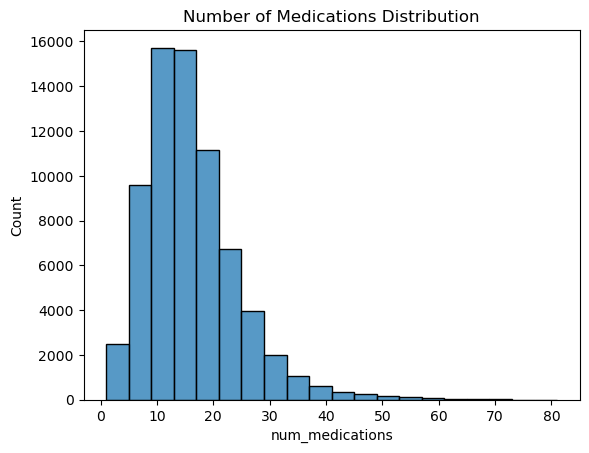

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=raw_data,x='num_medications', bins=20)
plt.title('Number of Medications Distribution')

Most patients were given around 15 different medications during their hospital visit.

Text(0.5, 1.0, 'Number of Lab Procedures Distribution')

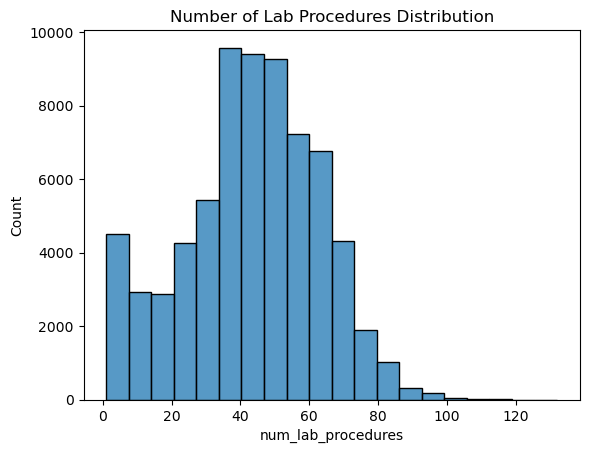

In [29]:
sns.histplot(data=raw_data,x='num_lab_procedures',bins=20)
plt.title('Number of Lab Procedures Distribution')

Most patients underwent around 40 lab procedures

Text(0.5, 1.0, 'Number of Procedures Distribution')

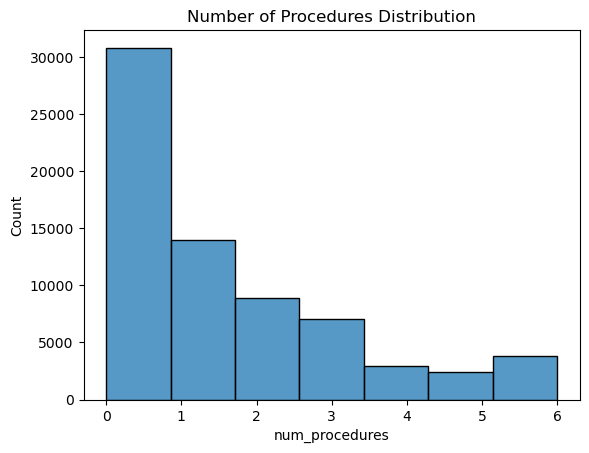

In [79]:
sns.histplot(data=raw_data,x='num_procedures', bins=7)
plt.title('Number of Procedures Distribution')

Almost half of patients underwent some type of procedure, not including lab tests.

Most patients received diabetes medications during their stay

<Axes: xlabel='diabetesMed'>

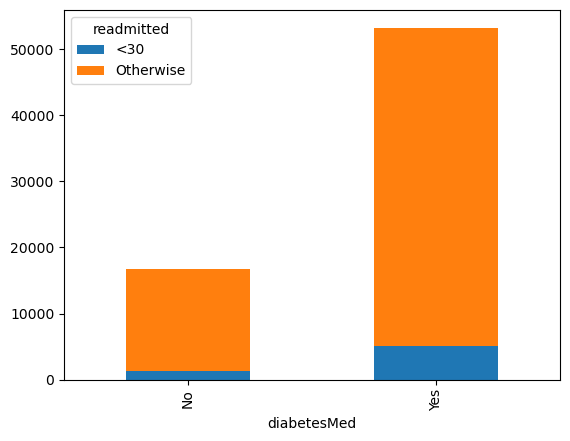

In [32]:
pd.crosstab(raw_data['diabetesMed'], raw_data['readmitted']).plot(kind='bar', stacked=True)

Higher number of patients readmission amongst patients who receive diabetes medications during their stay - both early readmission and after 30 days of discharge.

This could also be skewed as theres generally more representation of patients who received diabetes meds. Also we have imbalance in our classifers

In [33]:
raw_data['medical_specialty'].value_counts(ascending=False)

medical_specialty
Unknown                             33639
InternalMedicine                    10641
Family/GeneralPractice               4978
Emergency/Trauma                     4393
Cardiology                           4207
                                    ...  
SportsMedicine                          1
Dermatology                             1
Proctology                              1
Surgery-PlasticwithinHeadandNeck        1
Resident                                1
Name: count, Length: 71, dtype: int64

In [34]:
raw_data['readmitted'].value_counts()

readmitted
Otherwise    63696
<30           6277
Name: count, dtype: int64

In [81]:
raw_data['A1Cresult'].value_counts()

A1Cresult
Missing    57128
>8          6239
Norm        3741
>7          2865
Name: count, dtype: int64

Text(0.5, 1.0, 'Patient Hemoglobin A1C Results Distribution')

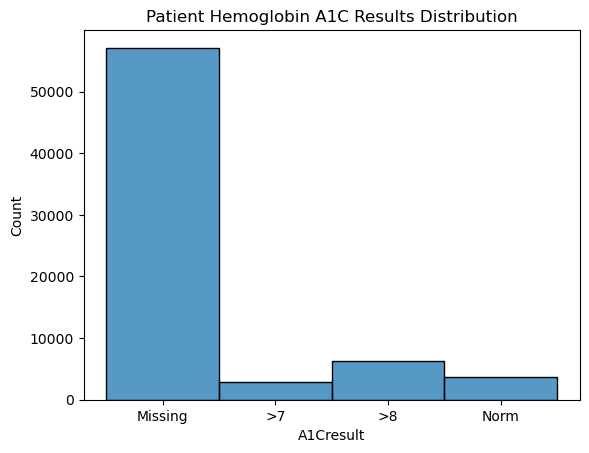

In [83]:
sns.histplot(data=raw_data, x= 'A1Cresult')
plt.title('Patient Hemoglobin A1C Results Distribution')

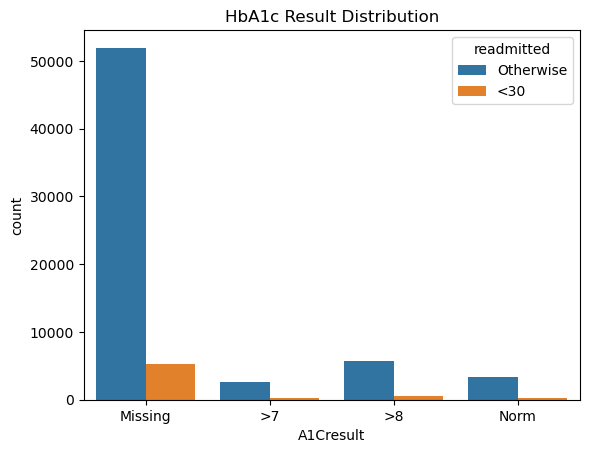

In [91]:
sns.countplot(x='A1Cresult', data=raw_data, hue='readmitted')
plt.title('HbA1c Result Distribution')
plt.savefig('HbA1c_Result_Distribution.png')

Most early readmission patients didn't have their HbA1C taken. Since this is such an important measure for efficacy of treatment we already know that the data has limited us.

In [86]:
# Extracting the rows where A1Cresult is none
no_A1C = raw_data[raw_data['A1Cresult'] == 'Missing']

Text(0.5, 1.0, 'HbA1c Result Distribution')

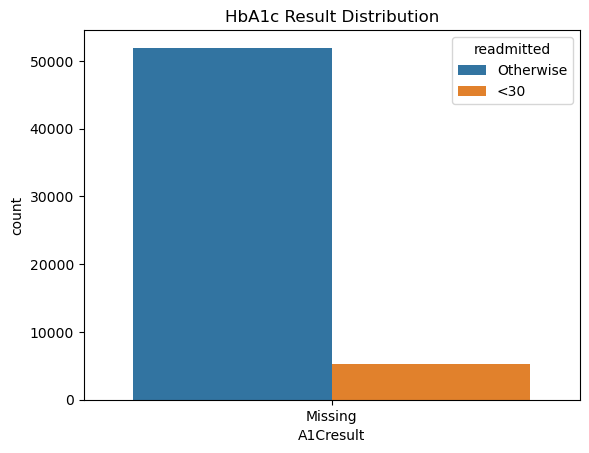

In [90]:
sns.countplot(x='A1Cresult', data=no_A1C, hue='readmitted')
plt.title('HbA1c Result Distribution')


HbA1c, aka, Hemoglobin A1C, is the most important measure of glucose control. It offers a unique opportunity to assess the efficacy of current therapy and to make changes in the therapy if indicated. Where HbA1C was not performed, there are much higher rates of early readmission within 30 days of discharge.

In [39]:
raw_data['max_glu_serum'].value_counts()

max_glu_serum
Norm    1700
>200     936
>300     712
Name: count, dtype: int64

The glucose serum result is another major indicator of diabetes readmission, since an unstable glucose indicates the patients was not in a stable condition during their visit.

Text(0.5, 1.0, 'Glucose Serum Result vs Readmission')

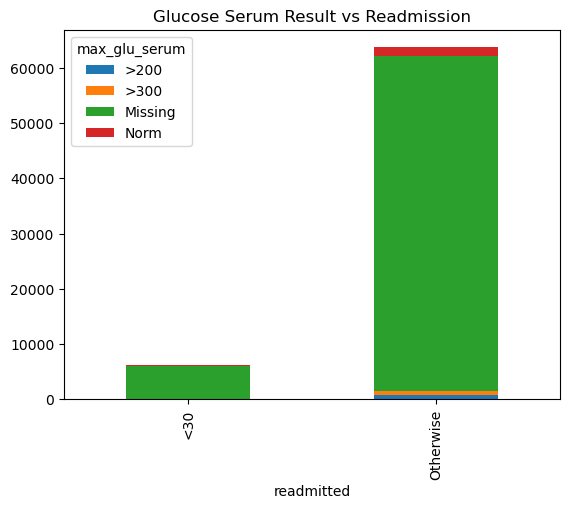

In [92]:
pd.crosstab(raw_data['readmitted'], raw_data['max_glu_serum']).plot(kind='bar', stacked=True)
plt.title('Glucose Serum Result vs Readmission')

This is difficult to understand since there are so many missing glucose serum results. Let's take out the None values to help us visualize better

In [93]:
#Extracting rows where max glu serum is not None
Glucose_Serum = raw_data[raw_data['max_glu_serum'] != 'Missing']

In [ ]:
pd.crosstab(raw_data['readmitted'], raw_data['max_glu_serum']).plot(kind='bar', stacked=True)
plt.title('Glucose Serum Result vs Readmission')

In [95]:
#extract the early readmission patients
early_readmission = raw_data[raw_data['readmitted'] == '<30']
early_readmission['max_glu_serum'].value_counts()

max_glu_serum
Missing    5937
Norm        166
>200        102
>300         72
Name: count, dtype: int64

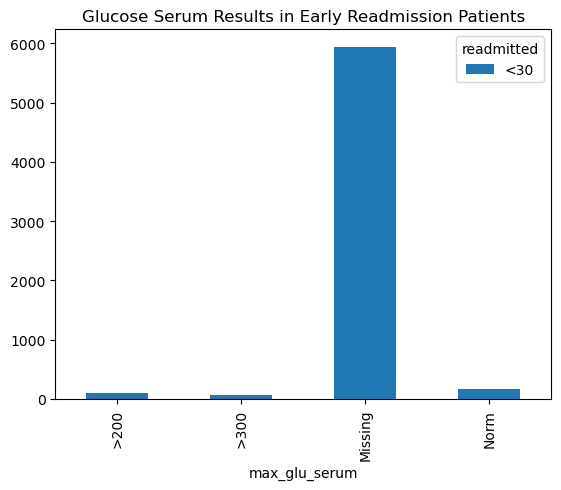

In [99]:
pd.crosstab(early_readmission['max_glu_serum'], early_readmission['readmitted']).plot(kind='bar', stacked=True)
plt.title('Glucose Serum Results in Early Readmission Patients')
plt.savefig('Glucose_Readmission_Distribution.png')


This is a drastic outcome that shows us how often glucose is not measured for a diabetes patient for some reason, and implies that there is a cost that comes with it, one of which is early readmission. 

In [44]:
raw_data['diag_1'].value_counts()

diag_1
414    5209
428    3876
786    3040
410    2774
486    2362
       ... 
671       1
148       1
826       1
870       1
V51       1
Name: count, Length: 695, dtype: int64

Text(0.5, 1.0, 'Race v Readmission')

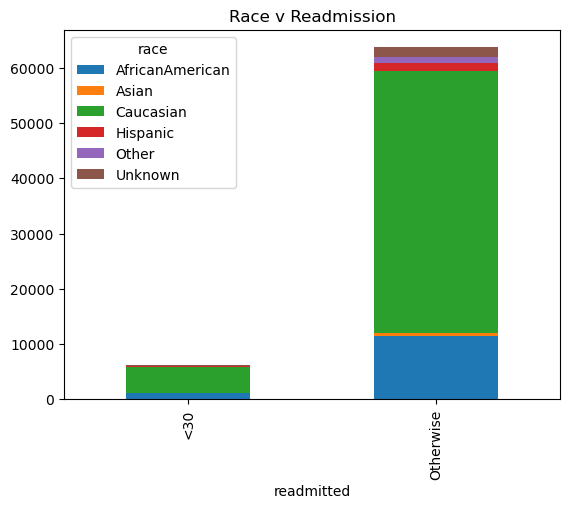

In [45]:
pd.crosstab(raw_data['readmitted'],raw_data['race']).plot(kind='bar', stacked=True)
plt.title('Race v Readmission')

Difficult to parse visually

Text(0.5, 1.0, 'Gender v Readmission')

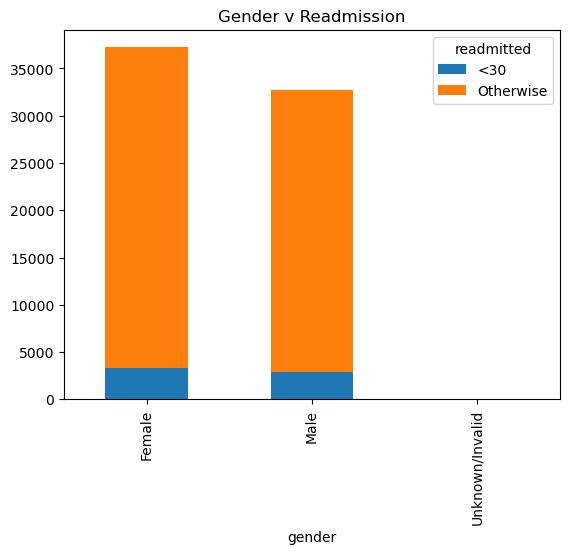

In [46]:
pd.crosstab(raw_data['gender'], raw_data['readmitted']).plot(kind='bar', stacked=True)
plt.title('Gender v Readmission')

No visible differences in readmission rates by gender

# SQL Exploration

In [100]:
#Connecting to sqlite database, converting the dataframe into the database,
# creating a table within the database to query from.

conn = sqlite3.connect('diabetes_data.db')
raw_data.to_sql('readmissions', conn, if_exists='replace', index=False)


69973

Interested in diving into medical specialties

In [101]:
query = '''
SELECT *
FROM readmissions

'''
pd.read_sql(query, conn)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Unknown,...,No,No,No,No,No,No,No,No,No,Otherwise
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,Unknown,...,No,Up,No,No,No,No,No,Ch,Yes,Otherwise
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,Unknown,...,No,No,No,No,No,No,No,No,Yes,Otherwise
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,Unknown,...,No,Up,No,No,No,No,No,Ch,Yes,Otherwise
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,Unknown,...,No,Steady,No,No,No,No,No,Ch,Yes,Otherwise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69968,443842016,183087545,Caucasian,Female,[70-80),1,1,7,9,Unknown,...,No,Steady,No,No,No,No,No,Ch,Yes,Otherwise
69969,443842022,188574944,Other,Female,[40-50),1,1,7,14,MD,...,No,Up,No,No,No,No,No,Ch,Yes,Otherwise
69970,443842070,140199494,Other,Female,[60-70),1,1,7,2,MD,...,No,Steady,No,No,No,No,No,No,Yes,Otherwise
69971,443842340,120975314,Caucasian,Female,[80-90),1,1,7,5,MC,...,No,Up,No,No,No,No,No,Ch,Yes,Otherwise


In [102]:
query = '''
SELECT COUNT(medical_specialty), medical_specialty
FROM readmissions
GROUP BY medical_specialty
HAVING (COUNT(medical_specialty) >= 1000)
ORDER BY COUNT(medical_specialty) DESC

'''
pd.read_sql(query, conn)

,COUNT(medical_specialty),medical_specialty
0,33639,Unknown
1,10641,InternalMedicine
2,4978,Family/GeneralPractice
3,4393,Emergency/Trauma
4,4207,Cardiology
5,2205,Surgery-General
6,1128,Orthopedics
7,1041,Orthopedics-Reconstructive


In [103]:
top_specialties = raw_data[raw_data['medical_specialty'].isin(['Unknown', 'InternalMedicine', 'Family/GeneralPractice', 'Emergency/Trauma', 'Cardiology', 'Surgery-General', 'Orthopedics','Orthopedics-Reconstructive'])]

Text(0.5, 1.0, 'Medical Specialty v Readmission')

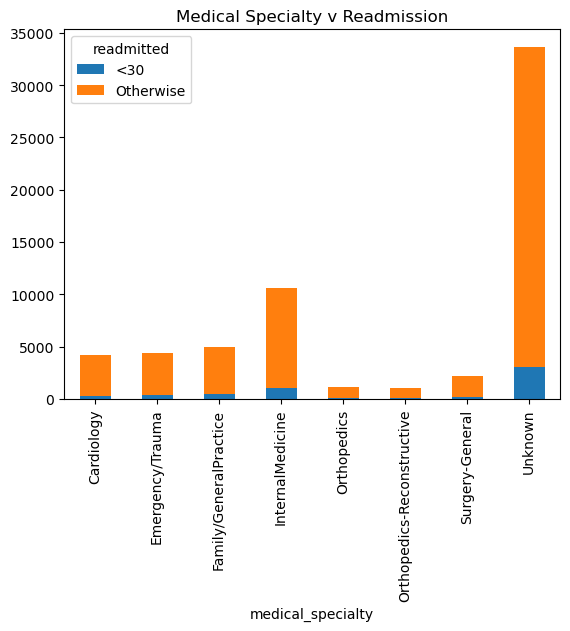

In [104]:
pd.crosstab(top_specialties['medical_specialty'], top_specialties['readmitted']).plot(kind='bar', stacked=True)
plt.title('Medical Specialty v Readmission')

In [105]:
query = '''
SELECT  AVG(num_medications),readmitted
FROM readmissions
GROUP BY readmitted

'''
pd.read_sql(query, conn)

,AVG(num_medications),readmitted
0,16.625777,<30
1,15.570601,Otherwise


In [106]:
query = '''
SELECT change, diabetesMed, time_in_hospital
FROM readmissions
WHERE (max_glu_serum != 'None')
ORDER BY time_in_hospital DESC

'''
pd.read_sql(query, conn)

,change,diabetesMed,time_in_hospital
0,Ch,Yes,14
1,Ch,Yes,14
2,Ch,Yes,14
3,Ch,Yes,14
4,Ch,Yes,14
...,...,...,...
69968,No,Yes,1
69969,No,No,1
69970,No,Yes,1
69971,Ch,Yes,1


In [107]:
conn.close()

## Evaluating Correlation between variables
Assessing correlation between categorical variables and target variable with Cramers V

In [108]:
import pandas as pd
import numpy as np
import scipy.stats as ss

#creating a function that takes cramer's v of given x and y variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

cramers_v(raw_data['race'], raw_data['readmitted'])

0.016132389608102378

In [109]:
cramers_v(raw_data['gender'], raw_data['readmitted'])

0.0029557738024236684

In [110]:
cramers_v(raw_data['A1Cresult'], raw_data['readmitted'])

0.010185991560538748

In [111]:
cramers_v(raw_data['admission_type_id'], raw_data['readmitted'])

0.016422855459728394

In [112]:
cramers_v(raw_data['max_glu_serum'], raw_data['readmitted'])

0.009997795725118764

In [113]:
cramers_v(raw_data['diabetesMed'], raw_data['readmitted'])

0.027793334380222176

In [114]:
cramers_v(raw_data['medical_specialty'], raw_data['readmitted'])

0.05397103323040231

In [115]:
cramers_v(raw_data['change'], raw_data['readmitted'])

0.014633240445494414

In [116]:
cramers_v(raw_data['insulin'], raw_data['readmitted'])

0.026898163942927263

So far, we are not seeing any visible correlations between the features and the target variable. 

This tells us that a linear relationship is not prevalent here.

The next step is find more complex, non linear relationship through modeling!

## Removing unimportant columns

In [117]:
raw_data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Unknown,...,No,No,No,No,No,No,No,No,No,Otherwise
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,Unknown,...,No,Up,No,No,No,No,No,Ch,Yes,Otherwise
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,Unknown,...,No,No,No,No,No,No,No,No,Yes,Otherwise
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,Unknown,...,No,Up,No,No,No,No,No,Ch,Yes,Otherwise
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,Unknown,...,No,Steady,No,No,No,No,No,Ch,Yes,Otherwise


encounter_id and patient_nbr are just means of idenfting unique hospital visits/encounters and patients. Since we have already ensure that we have no duplicate patient encounters in our data, it is safe to remove these columns. They won't be beneficial to us as features for predicting readmission.

In [121]:
cleaned_data = raw_data.drop(['encounter_id', 'patient_nbr'], axis=1)

cleaned_data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,Unknown,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,Otherwise
1,Caucasian,Female,[10-20),1,1,7,3,Unknown,Unknown,59,...,No,Up,No,No,No,No,No,Ch,Yes,Otherwise
2,AfricanAmerican,Female,[20-30),1,1,7,2,Unknown,Unknown,11,...,No,No,No,No,No,No,No,No,Yes,Otherwise
3,Caucasian,Male,[30-40),1,1,7,2,Unknown,Unknown,44,...,No,Up,No,No,No,No,No,Ch,Yes,Otherwise
4,Caucasian,Male,[40-50),1,1,7,1,Unknown,Unknown,51,...,No,Steady,No,No,No,No,No,Ch,Yes,Otherwise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,Caucasian,Female,[70-80),1,1,7,9,Unknown,Unknown,50,...,No,Steady,No,No,No,No,No,Ch,Yes,Otherwise
101755,Other,Female,[40-50),1,1,7,14,MD,Unknown,73,...,No,Up,No,No,No,No,No,Ch,Yes,Otherwise
101756,Other,Female,[60-70),1,1,7,2,MD,Unknown,46,...,No,Steady,No,No,No,No,No,No,Yes,Otherwise
101758,Caucasian,Female,[80-90),1,1,7,5,MC,Unknown,76,...,No,Up,No,No,No,No,No,Ch,Yes,Otherwise


In [122]:
#Export cleaned data as csv
cleaned_data.to_csv('cleaned_diabetes_data.csv')

## Things to Keep In Mind Before We Start Modeling

Handling sensitive features: race, age, gender
- need to monitor fairness
- possibly add fair classifers

Some imbalance amongst race repesentation
- see if we need to recategorize these as we are modeling 

Need to one-hot encode all categoricals